Created: 01/12/2020

Author: Ryan Corbyn


Edited: 


This is a set of code designed for plotting the saturation curve for either laser power or microwave frequency. 

In [97]:
# import required modules
import pandas as pd 
import numpy as np 
import scipy.optimize as opt 
import matplotlib.pyplot as plot
import os

In [98]:
def get_data(file_location):
    # Get the data from the data file. 
    
    data = pd.read_table(file_location)
    return(data)

In [99]:
def set_plot_params():
    # formats the plot parameters 
    plot.rcParams.update({'font.size' : 20})
    plot.rcParams.update({'figure.figsize' :[12, 10]})

In [177]:
def plot_contrast(laser_power, low_freq_contrast, high_freq_contrast):
    # Plot laser power vs contrast
    
    
    fig1, ax1 = plot.subplots(2,1)
    
    #set figure title
    ax1[0].set_title('ODMR Contrast vs Laser power with \n' + condition)
    #Plot data as scatter graph
    ax1[0].scatter(laser_power, low_freq_contrast, marker = 'x',
               color = 'b', label = 'Low frequency resonance')
    ax1[1].scatter(laser_power, high_freq_contrast, marker = 'x',
               color = 'r', label = 'High frequency resonance')
    #Set the X and Y labels
    ax1[1].set_xlabel(r'Laser Power ($\mu$W)')
    ax1[0].set_ylabel('Contrast (%)')
    ax1[1].set_ylabel('Contrast (%)')
    # Show the figure legend
    ax1[0].legend(loc = 'lower right')
    ax1[1].legend(loc = 'lower right')
    
    return(fig1, ax1)

In [178]:
def plot_FWHM(laser_power, low_freq_FWHM, high_freq_FWHM):
    # Plot laser power vs FWHM
    
    fig2, ax2 = plot.subplots(2,1)
    # set title
    ax2[0].set_title('FHMW vs Laser power with \n' + condition)
    
    # Plot data as scatter graph 
    ax2[0].scatter(laser_power, low_freq_FWHM, marker = 'x',
               color = 'b', label = 'Low frequency resonance')
    ax2[1].scatter(laser_power, high_freq_FWHM, marker = 'x',
               color = 'r', label = 'High frequency resonance')
    
    # set the x and y labels
    ax2[1].set_xlabel(r'Laser Power ($\mu$W)')
    ax2[0].set_ylabel('FWHM (MHz)')
    ax2[1].set_ylabel('FWHM (MHz)')
    
    # Show the legend
    ax2[0].legend(loc = 'upper right')
    ax2[1].legend(loc = 'upper right')
    
    return(fig2, ax2)

In [142]:
def saturation_curve(P_uw,  P_sat, c_inf):
    # creates a power dependence curve. 
    # y = Contrast as a functin of applied power, c_inf = maximum ODMR contrast
    # P_sat = stauration power.
    y = (c_inf * P_uw)/(P_uw + P_sat)
    return(y)

In [143]:
def exponent_equation(P_laser, a, b, c):
    # creates a exponential decay curve
    # a = amplitude, b = constant, c = offset. 
    
    y = a*np.exp((P_laser)/(-1*b)) + c

    return(y)

In [144]:
def optimised_sat_curve(x, y):
    # A method to find the fitting prameters for the ODMR dataset. 
    P0 = [1, 1] # initial parameters
    coeffs, confidence = opt.curve_fit(saturation_curve, x, y, P0) # Optimise the saturation curve fit. 
    
    opt_error = np.sqrt(np.diag(confidence)) # Get the errors for the satruation curve fit. 
    
    return(coeffs, opt_error)

In [145]:
def optimised_exp_curve(x, y):
    # A method to find the fitting prameters for the ODMR dataset. 
    P0 = [0.1, 200, 0.1] # initial values.
    coeffs, confidence = opt.curve_fit(exponent_equation, x, y, P0) # optimise the exponential fit. 
    opt_error = np.sqrt(np.diag(np.absolute(confidence)))# errors for exponential fit. 
 
    return(coeffs, opt_error)

In [146]:
def plot_fitting(ax2, laser_power,  y_fit, subplot, label):
    # plot the y fit. 
    subplot = int(subplot) # This code can be run for both subplots in the figure. 
    
    ax2[subplot].plot(laser_power, y_fit, color='k', label = label) # Plot the saturation curve fitting. 
    
    ax2[subplot].legend(loc= 'lower right') # show legend. 
    
    ax2[1].set_xlabel(r'Laser Power ($\mu$W)', fontsize = 18)
    ax2[subplot].set_ylabel('Contrast (%)', fontsize = 18)
    
    minimum = np.floor(y_fit[0]) 
    maximum = np.ceil(y_fit[len(y_fit)-1])
    
    ticks = np.linspace(minimum, maximum, num = int(maximum-minimum)+1) # Set the tick marks. 
    
    ax2[subplot].set_yticks(ticks)
    
    return(ax2)

In [179]:
def contrast_saturation_curve(laser_power, data, condition):
    # Laser saturation curve code.
    # Plot the laser power vs contrast 
    # Generate the saturation curve fits coefficents. 
    # Generate the saturation curve fitting. 
    
    fig1, ax1 = plot_contrast(laser_power, data.iloc[:,4], data.iloc[:,9])
    
    # fitting for the saturation curve
    contrast_coeffs1, contrast_opt_error1 = optimised_sat_curve(laser_power, data.iloc[:,4]) # generate saturation curve fit. 
    contrast_coeffs2, contrast_opt_error2 = optimised_sat_curve(laser_power, data.iloc[:,9]) # as above. 

    # Create the y data for the curve fitting
    y_fit1 = saturation_curve(laser_power, contrast_coeffs1[0], contrast_coeffs1[1]) # Create teh saturation curve array.
    y_fit2 = saturation_curve(laser_power, contrast_coeffs2[0], contrast_coeffs2[1]) # as above

    # Plot the curve fitting. 
    ax1 = plot_fitting(ax1, laser_power, y_fit1, '0', 'Saturation curve fitting')
    ax2 = plot_fitting(ax1, laser_power, y_fit2, '1', 'Saturation curve fitting')
    
    return(fig1, contrast_coeffs1, contrast_opt_error1, contrast_coeffs2, contrast_opt_error2)

In [148]:
def fwhm_saturation_curve(laser_power, data, condition):
    # FWHM saturation curve.
    # Plot the laser power vs contrast 
    # Generate the saturation curve fits coefficents. 
    # Generate the saturation curve fitting. 
    
    fig2, ax2 = plot_FWHM(laser_power, data.iloc[:,5], data.iloc[:,10]) # Plot the FWHM curves. 
    
    
    return(fig2)

In [149]:
def r_squared_saturation_curve(laser_power, data, condition):
    # Plot the laser power vs the R2 value for the fitting of the ODMR curves recorded 
    # for each laser power. 
    
    fig3, ax3 = plot.subplots()
    # create the plot
    plot.title('R^2 vs Laser power with \n' + condition)
    
    ax3.scatter(laser_power, data['R^2 for fitting'], marker = 'x',
           color = 'k', label = 'R^2 value for Lorentz \nfitting')
    ax3.set_xlabel(r'Laser Power ($\mu$W)')
    ax3.set_ylabel('R squared fitting value')
    # fitting for the saturation curve
    r_squared_coeffs, r_squared_opt_error = optimised_sat_curve(laser_power, data['R^2 for fitting'])
    # Generate saturation curve for the R^2 value.
    y_fit3 = saturation_curve(laser_power, r_squared_coeffs[0], r_squared_coeffs[1])
    # Plot saturation curve for the R^2 value. 
    ax3.plot(laser_power, y_fit3, label = 'Fitted saturation curve')
    ax3.legend(loc='lower right')
    
    
    return(fig3, r_squared_coeffs, r_squared_opt_error)

In [180]:
def chi_squared_sat_curve(laser_power, data, condition):
    # plot Chi squared vs laser power and generating a fitting to the curve.
    
    chi_squared = data.iloc[:,14] 

    fig5, ax5 = plot.subplots()
    plot.title('Chi^2 vs Laser power with \n' + condition)
    
    ax5.scatter(laser_power, chi_squared, marker = 'x',
               color = 'k', label = 'Chi Squared for \nLorentz fitting') # Plot data 
    ax5.set_xlabel(r'laser power ($\mu$W)')
    ax5.set_ylabel('Normalised Chi Squared')
    
    chi_squared_coeffs, chi_squared_errors = optimised_exp_curve(laser_power, chi_squared) # optimise with exponential fit.  

    y_fit =  exponent_equation(laser_power, chi_squared_coeffs[0], 
                              chi_squared_coeffs[1], chi_squared_coeffs[2]) # create exponential fit. 
    
    ax5.plot(laser_power, y_fit, color='r', label = 'A*exp(-(P_laser)/B) + C')
    
    ax5.legend(loc = 'upper right')
    
    return(fig5, chi_squared_coeffs, chi_squared_errors)

In [181]:
def rms_error_sat_curve(laser_power, data, condition):
    # Plot the RMS error as a fuction of laser power. 
    
    rms_error = data.iloc[:,15]
    
    fig6, ax6 = plot.subplots()
    plot.title('RMS error vs Laser power with \n' + condition)
    
    ax6.scatter(laser_power, rms_error, marker = 'x', 
               color = 'k', label = 'RMS error for  \nLorentz fitting') # Plot data 
    ax6.set_xlabel(r'laser power ($\mu$W)')
    ax6.set_ylabel('Normalised RMS Error')
    
    rms_error_coeffs, rms_error_errors = optimised_exp_curve(laser_power, rms_error) # optimise curve fit. 

    y_fit =  exponent_equation(laser_power, rms_error_coeffs[0], 
                               rms_error_coeffs[1], rms_error_coeffs[2])
    
    ax6.plot(laser_power, y_fit, color='r', label = 'A*exp(-(P_laser)/B) + C')
    
    ax6.legend(loc = 'upper right')
    

    return(fig6, rms_error_coeffs, rms_error_errors)

In [152]:
def off_resonant_signal_sat_curve(laser_power, data, condition):
    # Plot the off resonant signal for the NV centre vs laser power. 
    
    fig4, ax4 = plot.subplots()
    plot.title('Off Resonant fluorescent signal vs Laser power with \n' + condition)
    
    off_res_sig = data.iloc[:,12]
    ax4.scatter(laser_power, off_res_sig, color = 'k', 
               marker = 'x', label='Off resonant \nfluorescent signal')
    ax4.set_xlabel(r'Laser Power ($\mu$W)')
    ax4.set_ylabel('Counts (per 1ms)')
    # fitting for the saturation curve
    off_res_coeffs, off_res_opt_error = optimised_sat_curve(laser_power, off_res_sig)
 
    # Generate saturation curve for the R^2 value.
    y_fit4 = saturation_curve(laser_power, off_res_coeffs[0], off_res_coeffs[1])
    # Plot saturation curve for the R^2 value. 
    ax4.plot(laser_power, y_fit4, label = 'Fitted saturation curve')
    ax4.legend(loc='lower right')
    
    
    return(fig4, off_res_coeffs, off_res_opt_error)

In [167]:
def save_data(date, file_ID, fig1, fig2, fig3, fig4, fig5, fig6, contrast_coeffs1, 
              contrast_opt_error1, contrast_coeffs2, contrast_opt_error2,
              r_squared_coeffs, r_squared_opt_error, off_res_coeffs, off_res_opt_error, 
              chi_squared_coeffs, chi_squared_errors, rms_error_coeffs, rms_error_errors):
    
    destination_folder = 'I:\\Science\\Physics-Nanobiophotonics\\Group\\User Data Analysis\\Ryans Data (2018-2021)\\ODMR\\20201120\\Saturation_curves\\'
    saturation_data_file = destination_folder + date  + '_Saturation_curve_data_' + file_ID + '.dat'
    decay_curve_data_file = destination_folder + date  + '_Decay_curve_data_' + file_ID + '.dat'
    
    # Checking to see if the folder exists in which to save the data, and creating it if it does not
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)
        # Checking the output file exists and creating and initialising it if not
    
    ## Save the Saturation curve coefficients and errors 
    if os.path.isfile(saturation_data_file) == False:
        with open(saturation_data_file, "w") as wf:
            wf.write('\t'  + 'Saturation Power (Micro Watts)' + '\t' + 'Saturation Power Error (Micro Watts)'
                    + '\t' + 'Infinate Power value' + '\t' + 'Infinate Power value error' + '\n')
    # Writing contrast dip description to the .dat file
    
    with open(saturation_data_file, "a") as wf:
        wf.write('Low res freq contrast (%)' + '\t' + str(contrast_coeffs1[0]) + '\t' + str(contrast_opt_error1[0]) +
                 '\t' + str(contrast_coeffs1[1]) + '\t' + str(contrast_opt_error1[1]) + '\n' + 
                 'High res freq contrast (%)' + '\t' + str(contrast_coeffs2[0]) + '\t' + str(contrast_opt_error2[0]) +
                 '\t' + str(contrast_coeffs2[1]) + '\t' + str(contrast_opt_error2[1]) + '\n' +
                 'R_Squared value' + '\t' + str(r_squared_coeffs[0]) + '\t' + str(r_squared_opt_error[0]) +'\t'+ 
                  str(r_squared_coeffs[1]) + '\t' + str(r_squared_opt_error[1]) +'\n'+
                 'Off Resonant Fluorescent Signal (per 1ms)' + '\t' + str(off_res_coeffs[0]) + '\t' + str(off_res_opt_error[0]) +'\t'+ 
                  str(off_res_coeffs[1]) + '\t' + str(off_res_opt_error[1])                                                                 
                )
            
    ## Save the exponential curve fit parameters and errors.         
    if os.path.isfile(decay_curve_data_file) == False:
        with open(decay_curve_data_file, "w") as wf:
                wf.write('\t'  + 'Amplitude' + '\t' +  'Amplitude error' +'\t' +'Decay constant (Micro Watts)'
                    + '\t' + 'Decay constant error (Micro Watts)' + '\t' + 
                     'Offset' + '\t' + 'offset error' + '\n')
            
    with open(decay_curve_data_file, "a") as wf:
        wf.write('Chi Squared fitting parameter' + '\t' + str(chi_squared_coeffs[0]) + '\t' + str(chi_squared_errors[0]) +
                 '\t' + str(chi_squared_coeffs[1]) + '\t' + str(chi_squared_errors[1]) + '\t' +
                 str(chi_squared_coeffs[2]) + '\t' + str(chi_squared_errors[2]) +'\n' + 
                 'RMS Error of fitting' + '\t' + str(rms_error_coeffs[0]) + '\t' + str(rms_error_errors[0]) +
                 '\t' + str(rms_error_coeffs[1]) + '\t' + str(rms_error_errors[1]) + '\t' +
                  str(rms_error_coeffs[2]) + '\t' + str(rms_error_errors[2]) + '\n'                                                         
                )
                                                        
        
    # Saving a plot of the raw data to a folder. 
    fig1.savefig(destination_folder + file_ID + '_contrast_sat_curve.pdf', transparent = True)    
    fig1.savefig(destination_folder + file_ID + '_contrast_sat_curve.png', transparent = True) 
  
    fig2.savefig(destination_folder + file_ID + '_FWHM_sat_curve.pdf', transparent = True)    
    fig2.savefig(destination_folder + file_ID + '_FWHM_sat_curve.png', transparent = True) 
   
    fig3.savefig(destination_folder + file_ID + '_r_squared_sat_curve.pdf', transparent = True)    
    fig3.savefig(destination_folder + file_ID + '_r_squared_sat_curve.png', transparent = True) 

    fig4.savefig(destination_folder + file_ID + '_off_res_signal_sat_curve.pdf', transparent = True)    
    fig4.savefig(destination_folder + file_ID + '_off_res_signal_sat_curve.png', transparent = True) 
    
    fig5.savefig(destination_folder + file_ID + '_norm_chi_squared_sat_curve.pdf', transparent = True) 
    fig5.savefig(destination_folder + file_ID + '_norm_chi_squared_sat_curve.png', transparent = True) 
    
    fig6.savefig(destination_folder + file_ID + '_norm_RMS_error_sat_curve.pdf', transparent = True)    
    fig6.savefig(destination_folder + file_ID + '_norm_RMS_error_sat_curve.png', transparent = True) 

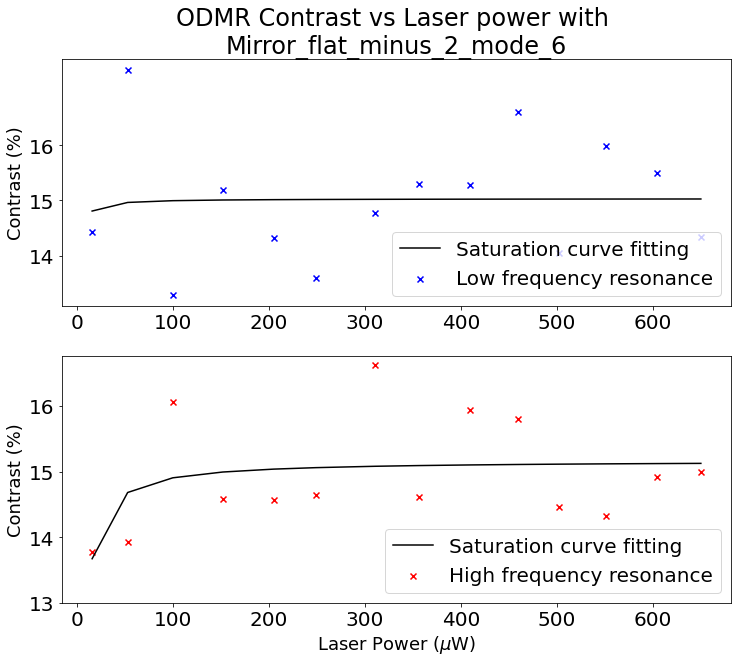

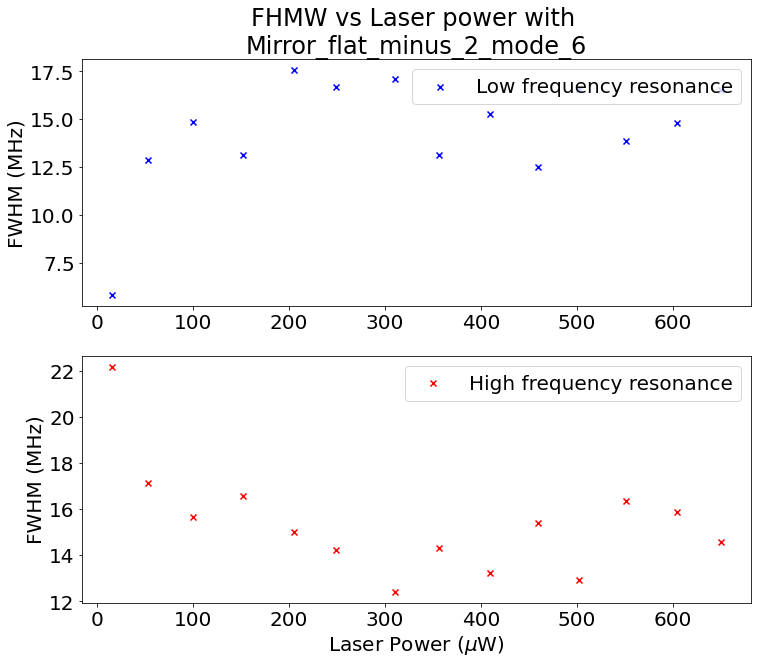

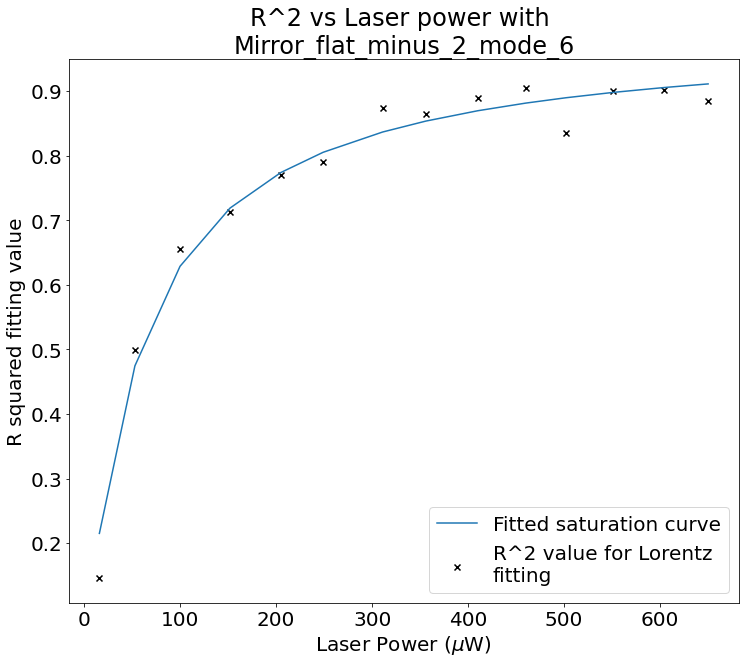

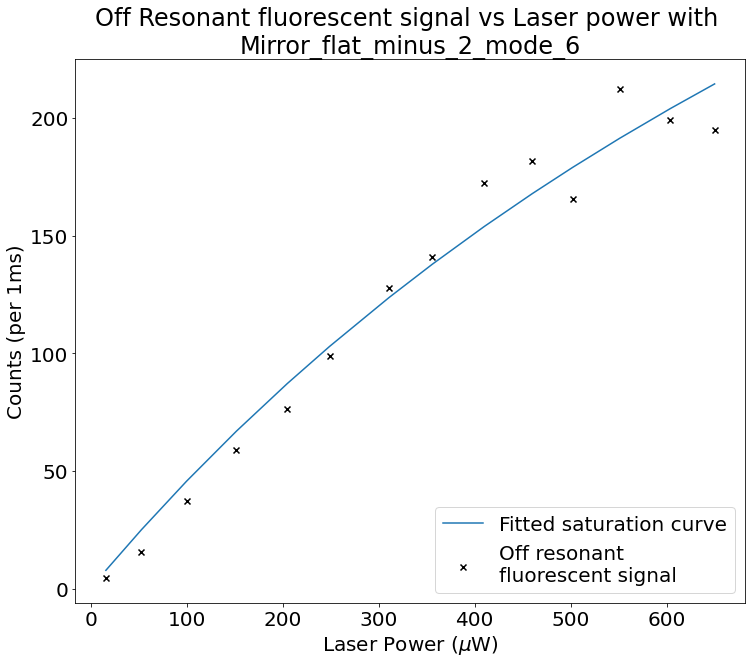

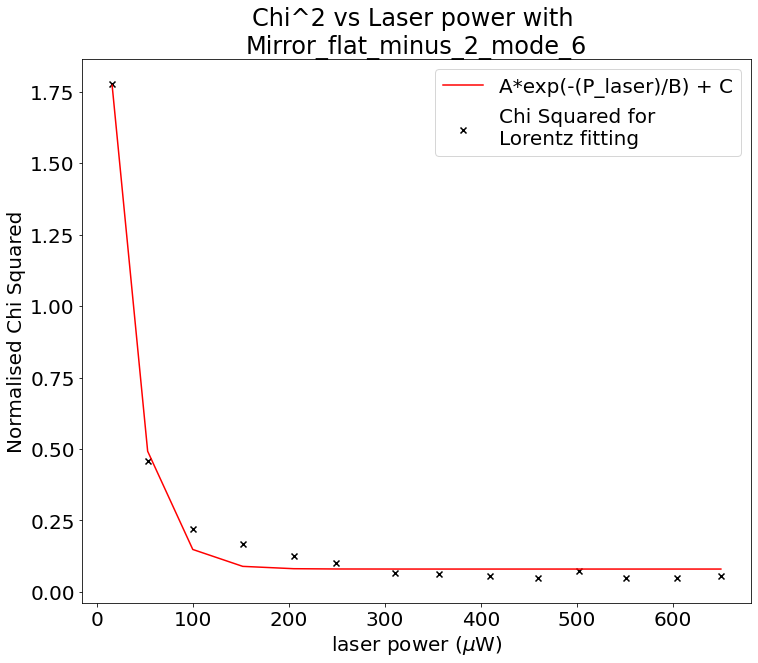

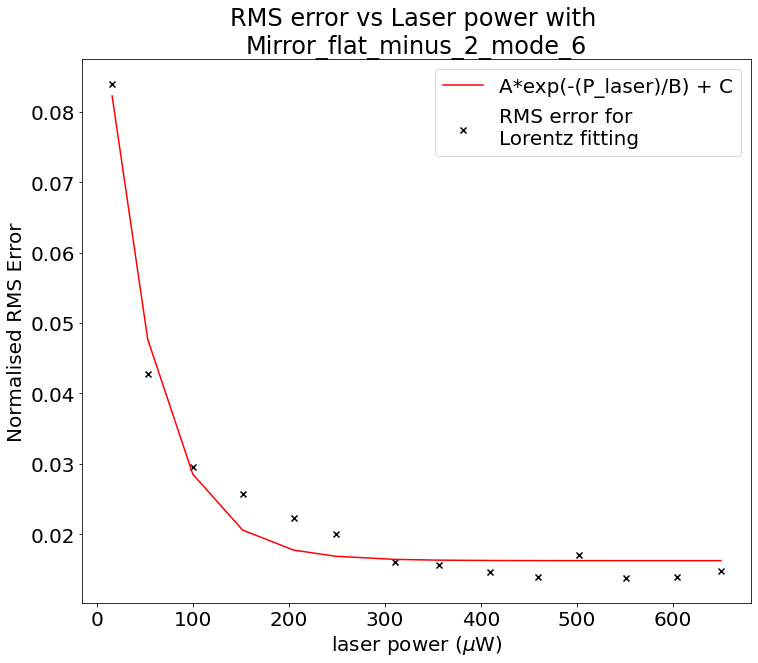

In [175]:
# main script 
folder_path = 'I:\\Science\\Physics-Nanobiophotonics\\Group\\User Data Analysis\\Ryans Data (2018-2021)\\ODMR\\20201120\\additional_analysis\\'
date = '20201120'
file_path = '20201120_NVScan_double_peak_analysis_Mirror_flat_minus_2_mode_6'

condition = 'Mirror_flat_minus_2_mode_6'

data = get_data(folder_path + file_path + '.dat')
laser_power = np.array([16, 53, 100, 152, 205, 249, 311, 356, 410, 460, 502, 551, 604, 650])
#laser_power = laser_power*0.1
#set plot params
set_plot_params()

# Call the saturation curve code

# The Laser power vs ODMR contrast curve. 
fig1, contrast_coeffs1, contrast_opt_error1, contrast_coeffs2, contrast_opt_error2 = contrast_saturation_curve(laser_power, data, condition)

# FWHM vs laser power. 
fig2 = fwhm_saturation_curve(laser_power, data, condition)

# R squared for lornetz fitttings vs laser power
fig3, r_squared_coeffs, r_squared_opt_error = r_squared_saturation_curve(laser_power, data, condition)

# Off resonant fluorescent intensity vs laser power. 
fig4, off_res_coeffs, off_res_opt_error = off_resonant_signal_sat_curve(laser_power, data, condition)

# Chi squared for lorentz fitting vs laser power. 
fig5, chi_squared_coeffs, chi_squared_errors = chi_squared_sat_curve(laser_power, data, condition)

# RMS error for lorentz curve fittins vs laser power. 
fig6, rms_error_coeffs, rms_error_errors = rms_error_sat_curve(laser_power, data, condition)

save_data(date, condition, fig1, fig2, fig3, fig4, fig5, fig6, 
          contrast_coeffs1, contrast_opt_error1, contrast_coeffs2, contrast_opt_error2,
           r_squared_coeffs, r_squared_opt_error, off_res_coeffs, off_res_opt_error, 
            chi_squared_coeffs, chi_squared_errors, rms_error_coeffs, rms_error_errors)

In [176]:
print(rms_error_coeffs)
print(data.iloc[:,4])

[9.09738692e-02 4.99524481e+01 1.62441724e-02]
0     14.423304
1     17.358123
2     13.285362
3     15.188387
4     14.317337
5     13.599588
6     14.765867
7     15.306416
8     15.281507
9     16.611433
10    14.042728
11    15.996912
12    15.491496
13    14.342722
Name: Resonant frequency 1 contrast (%), dtype: float64


In [ ]:
print(data)